# FBI IC3 Internet Crime Report – Complaints & Losses (Supporting Data for Research Paper)

This repository contains the dataset and analysis notebook used in the research paper:

“An Analysis of Cyber Threats and the Protective Role of Cyber Insurance in the US Market”
Muhammad, Z., Straub, J. (2025). In: Daimi, K., Arabnia, H.R., Deligiannidis, L. (eds) Security and Management and Wireless Networks. CSCE 2024. Communications in Computer and Information Science, vol 2254. Springer, Cham.
https://doi.org/10.1007/978-3-031-86637-1_19


Operated by the Federal Bureau of Investigation (FBI)
This code will provide graphical visulization of Cybercrime complaints and losses statistics over the past 15 years from 2010 to 2024.




# About the Paper

The emerging landscape of cyber threats is growing in complexity and impact. Cybersecurity continues to be a critical issue, particularly for small and medium-sized businesses, as cyberattacks become increasingly sophisticated.

To build resilience, organizations must combine both technical defenses and financial measures. One important financial measure is risk transfer through cyber insurance.

**This paper:**

* Analyzes current cyber threat trends using literature, publicly available datasets, and FBI IC3 reports.

* Identifies the sectors most frequently targeted by cybercriminals.

* Evaluates the protective and recovery role of cyber insurance, with a focus on SMEs.

* Discusses potential policy reforms to ensure sustainable cyber insurance coverage.

# About this Repository

This repository provides:

Notebook: FBI IC3 Internet Crime Report Complaints - Losses.ipynb

Data exploration and visualization of FBI IC3 internet crime complaints and financial losses.

Used to support the analysis presented in the above research paper.

Open in Colab:  https://colab.research.google.com/drive/1ngdynFg3q8rGK4-RoSSU8yNnwbcf1zBy?usp=sharing


# If you use or rely on this dataset/notebook, please cite the paper:

Muhammad, Z., Straub, J. (2025). An Analysis of Cyber Threats and the Protective Role of Cyber Insurance in the US Market. In: Daimi, K., Arabnia, H.R., Deligiannidis, L. (eds) Security and Management and Wireless Networks. CSCE 2024. Communications in Computer and Information Science, vol 2254. Springer, Cham.
https://doi.org/10.1007/978-3-031-86637-1_19

⚠️ Note: The dataset is based on publicly available information from the FBI Internet Crime Complaint Center (IC3).

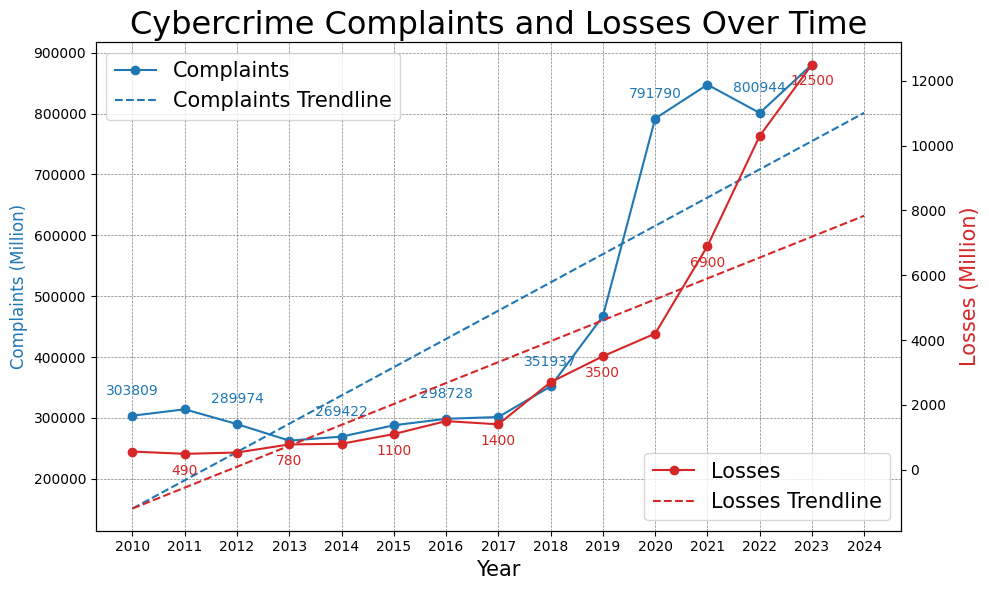

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
complaints = [303809, 314246, 289974, 262813, 269422, 288012, 298728, 301580, 351937, 467361, 791790, 847376, 800944, 880418, None]
losses_billion = [0.56, 0.49, 0.53, 0.78, 0.80, 1.10, 1.50, 1.40, 2.70, 3.50, 4.20, 6.90, 10.30, 12.5, None]

# Convert losses to million
# losses_million = [x * 1e3 for x in losses_billion]
losses_million = [560, 490, 530, 780, 800, 1100, 1500, 1400, 2700, 3500, 4200, 6900, 10300, 12500, None]

# Line Chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting complaints
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Complaints (Million)', color=color, fontsize=12)
ax1.plot(years, complaints, marker='o', linestyle='-', color=color, label='Complaints')
# for i, txt in enumerate(complaints):
#     if txt is not None:
#         ax1.annotate(txt, (years[i], complaints[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(complaints):
    if txt is not None and i % 2 == 0:  # Show label for odd indices
        ax1.annotate(txt, (years[i], complaints[i]), textcoords="offset points", xytext=(0,15), ha='center', color=color, fontsize=10)


# Plotting trendline for complaints
slope, intercept, _, _, _ = stats.linregress(years[:-2], complaints[:-2]) # Excluding None values for future years
trendline_complaints = intercept + slope * np.array(years)
ax1.plot(years, trendline_complaints, linestyle='--', color=color, label='Complaints Trendline')

# Adding legend for complaints
ax1.legend(loc='upper left', fontsize=15)

# Creating a second y-axis for losses
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Losses (Million)', color=color, fontsize=15)
ax2.plot(years, losses_million, marker='o', linestyle='-', color=color, label='Losses')
# for i, txt in enumerate(losses_million):
#     if txt is not None:
#         ax2.annotate(txt, (years[i], losses_million[i]), textcoords="offset points", xytext=(0,-10), ha='center')
# Plotting complaints
for i, txt in enumerate(losses_million):
    if txt is not None and i % 2 != 0:  # Show label for even indices
        ax2.annotate(txt, (years[i], losses_million[i]), textcoords="offset points", xytext=(0,-15), ha='center', color=color, fontsize=10)


# Plotting trendline for losses
slope, intercept, _, _, _ = stats.linregress(years[:-2], losses_million[:-2]) # Excluding None values for future years
trendline_losses = intercept + slope * np.array(years)
ax2.plot(years, trendline_losses, linestyle='--', color=color, label='Losses Trendline')

# Adding legend for losses
ax2.legend(loc='lower right', fontsize=15)

# Adding primary horizontal gridlines in light color
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_xticks(years)

plt.title('Cybercrime Complaints and Losses Over Time', fontsize=23)
fig.tight_layout()
plt.show()


#Ransomware complaints and losses in million

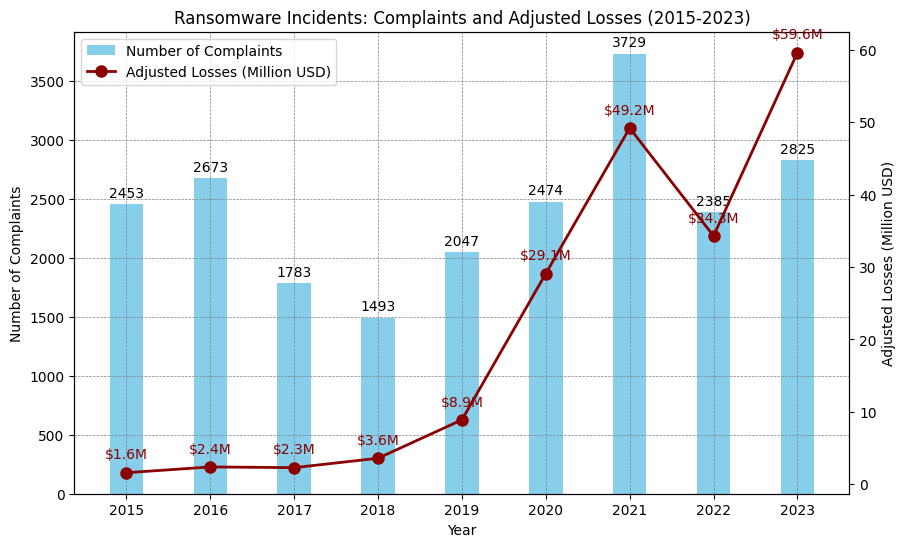

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Data for Ransomware
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
complaints = [2453, 2673, 1783, 1493, 2047, 2474, 3729, 2385, 2825]
losses_million = [1.6, 2.4, 2.3, 3.6, 8.9, 29.1, 49.2, 34.3, 59.6]  # Already in million USD

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for the number of complaints
bars = ax1.bar(years, complaints, color='skyblue', label='Number of Complaints', width=0.4)

# Annotate data points on bar chart
for bar in bars:
    height = bar.get_height()
    ax1.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Line chart for the adjusted losses
ax2 = ax1.twinx()
line, = ax2.plot(years, losses_million, color='darkred', marker='o', linestyle='-', linewidth=2, markersize=8, label='Adjusted Losses (Million USD)')

# Annotate data points on line chart
for i, txt in enumerate(losses_million):
    ax2.annotate(f"${txt}M", (years[i], losses_million[i]), textcoords="offset points", xytext=(0,10), ha='center', color='darkred')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Complaints', color='black')
ax2.set_ylabel('Adjusted Losses (Million USD)', color='black')

# Adjusting legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', ncol=1)

# Adding primary horizontal gridlines in light color
ax1.grid(which='major', linestyle='--', linewidth=0.5, color='gray')
# ax2.grid(which='major', linestyle='--', linewidth=0.5, color='gray')
ax1.set_xticks(years)

plt.title('Ransomware Incidents: Complaints and Adjusted Losses (2015-2023)')
plt.show()


# Cyber Insurance research published each year

For our primary source of research, we used Google Scholar, which provides access to articles, books, conference papers, and so on. During our search, we found three different variants of the term “cyber insurance” used in literature. We started by searching each one individually. For instance, when we searched “Cyber insurance,” we found a total of 210,000 results. When we searched “Cyberinsurance,” we found 227,000 results, and when we searched “cyber-insurance,” we found 8,270 results. So, we combined all three queries and searched as “cyberinsurance OR Cyber Insurance OR cyber-insurance,” which gave us a total of 144,000 results.

These numbers present a high difficulty in finding papers specifically dedicated to the field. Instead, this is giving us every resource that mentions our keywords anywhere in the paper, therefore relying on these numbers can be misleading. To refine our research further, we pinpointed our research term more specifically and searched for papers that mention either of these keywords in their title. To achieve this, we used this research query: intitle:“cyberinsurance” OR intitle:“Cyber Insurance” OR intitle:“cyber-insurance”. Bravo! Now we were seeing the real numbers of research papers that are specifically aligned with our research and mention cyber insurance in their title. The total number was 1,010.

The next part was to divide these into years. According to the Federal Reserve Bank of Chicago, cyber insurance was first introduced in the spring of 1997 when Steven Haase helped AIG write the first internet security liability policy. Therefore, the first time this term was used was after that, and there is no research that uses this term before that time. So, we divided the years from 1997 to 2024 into nine equal parts for fair distribution of research conducted. Figure 1 provides a visual representation of scholarly articles in the form of knowledge distribution graphs for Google Scholars, starting from 1997 to 2023. We added three years to each part to identify the end year of each period. As we can see in the image, the number of articles published each period has increased significantly. For instance, there were only two articles published in the first period (1997 to 1999), but by 2009 to 2011, there were 39 articles published. The number of articles published on the topic of cyber insurance accelerates over the years, particularly from 2012 onwards. The period of peak was 2018 to 2020, where 298 articles were published. Although there is a slight decrease in articles published in the most recent period (2021 to 2023), with 252 articles, it is still significantly higher than in earlier years. This suggests ongoing interest and research in the field. For the current year, the single year of 2024 already has 28 articles published, which, while still early in the year, shows a continuation of interest in the subject. Overall, this data suggests that research interest in cyber insurance has grown significantly over time and continues to be an area of active research

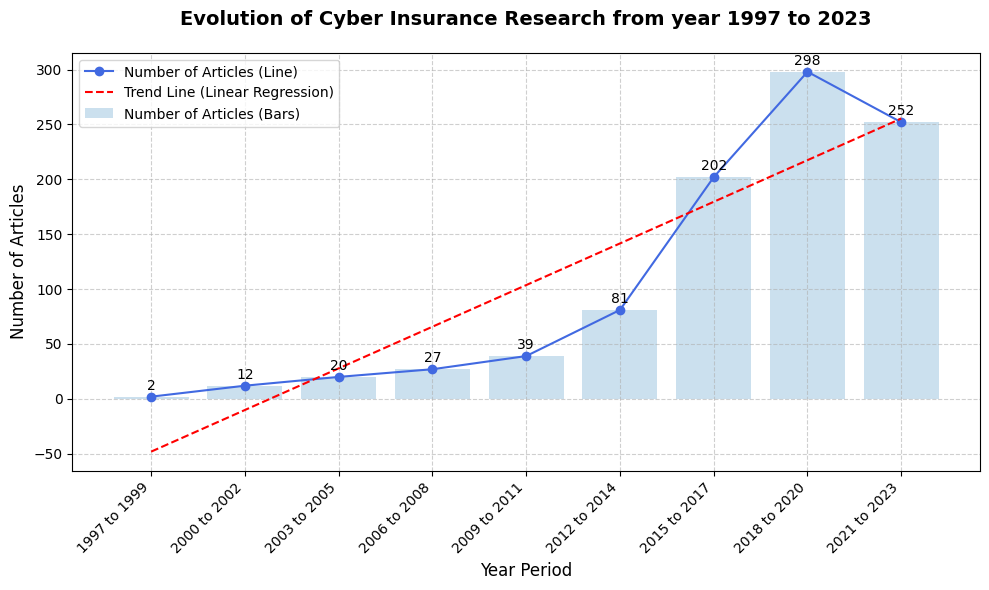

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data
periods = [
    "1997 to 1999", "2000 to 2002", "2003 to 2005",
    "2006 to 2008", "2009 to 2011", "2012 to 2014",
    "2015 to 2017", "2018 to 2020", "2021 to 2023"]

articles = [2, 12, 20, 27, 39, 81, 202, 298, 252]

# Convert periods to an array of numeric values for plotting trendline
x = np.arange(len(periods))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars with light color
bar_color = '#A9CCE3'  # Light blue color for bars
ax.bar(x, articles, color=bar_color, alpha=0.6, label='Number of Articles (Bars)')

# Plot the data as a line chart
ax.plot(x, articles, marker='o', linestyle='-', color='royalblue', label='Number of Articles (Line)')

# Add a trend line using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, articles)
trendline = slope * x + intercept
ax.plot(x, trendline, color='red', linestyle='--', label='Trend Line (Linear Regression)')

# Add labels and title
ax.set_xlabel('Year Period', fontsize=12)
ax.set_ylabel('Number of Articles', fontsize=12)
ax.set_title('Evolution of Cyber Insurance Research from year 1997 to 2023', fontsize=14, fontweight='bold', pad=20)

# Customize x-axis ticks for better visibility
ax.set_xticks(x)
ax.set_xticklabels(periods, rotation=45, ha='right')

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Add a legend
ax.legend(loc='upper left')

# Add data point labels for clarity
for i in range(len(x)):
    ax.annotate(articles[i], (x[i], articles[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Display the chart
plt.tight_layout()
plt.show()


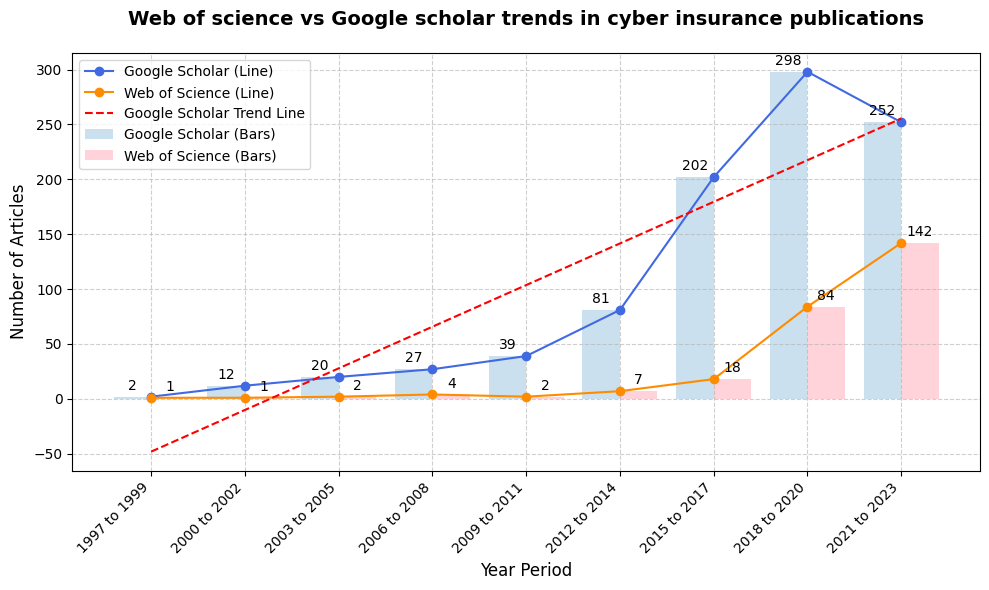

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data
periods = [
    "1997 to 1999", "2000 to 2002", "2003 to 2005",
    "2006 to 2008", "2009 to 2011", "2012 to 2014",
    "2015 to 2017", "2018 to 2020", "2021 to 2023"]

google_scholar_articles = [2, 12, 20, 27, 39, 81, 202, 298, 252]
web_of_science_articles = [1, 1, 2, 4, 2, 7, 18, 84, 142]  # Example second column

# Convert periods to an array of numeric values for plotting trendline
x = np.arange(len(periods))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars with light color for Google Scholar
bar_color = '#A9CCE3'  # Light blue color for bars
ax.bar(x - 0.2, google_scholar_articles, width=0.4, color=bar_color, alpha=0.6, label='Google Scholar (Bars)')

# Plot the bars with different color for Web of Science
bar_color_web = '#FFB6C1'  # Light pink color for bars
ax.bar(x + 0.2, web_of_science_articles, width=0.4, color=bar_color_web, alpha=0.6, label='Web of Science (Bars)')

# Plot the data as line charts for both datasets
ax.plot(x, google_scholar_articles, marker='o', linestyle='-', color='royalblue', label='Google Scholar (Line)')
ax.plot(x, web_of_science_articles, marker='o', linestyle='-', color='darkorange', label='Web of Science (Line)')

# Add a trend line using linear regression for Google Scholar
slope, intercept, r_value, p_value, std_err = stats.linregress(x, google_scholar_articles)
trendline_google_scholar = slope * x + intercept
ax.plot(x, trendline_google_scholar, color='red', linestyle='--', label='Google Scholar Trend Line')

# Add labels and title
ax.set_xlabel('Year Period', fontsize=12)
ax.set_ylabel('Number of Articles', fontsize=12)
ax.set_title('Web of science vs Google scholar trends in cyber insurance publications', fontsize=14, fontweight='bold', pad=20)

# Customize x-axis ticks for better visibility
ax.set_xticks(x)
ax.set_xticklabels(periods, rotation=45, ha='right')

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Add a legend
ax.legend(loc='upper left')

# Add data point labels for clarity
for i in range(len(x)):
    ax.annotate(google_scholar_articles[i], (x[i] - 0.2, google_scholar_articles[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    ax.annotate(web_of_science_articles[i], (x[i] + 0.2, web_of_science_articles[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Display the chart
plt.tight_layout()
plt.show()


#Top five reported crime types for the years of 2016 to 2023.  

<ipython-input-1-1e27043ff5f6>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


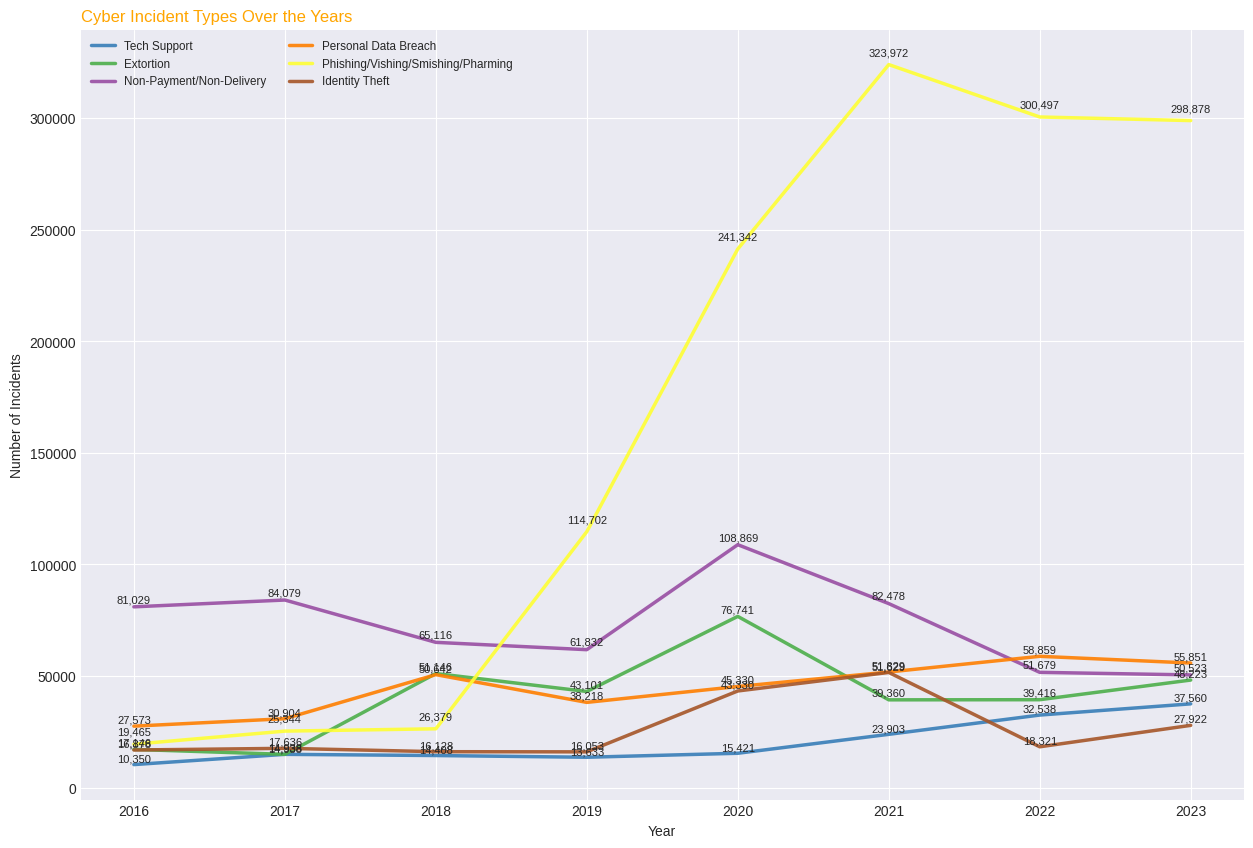

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Data hardcoded as per the table provided
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Tech Support': [10350, 14938, 14408, 13633, 15421, 23903, 32538, 37560],
    'Extortion': [17146, 14938, 51146, 43101, 76741, 39360, 39416, 48223],
    'Non-Payment/Non-Delivery': [81029, 84079, 65116, 61832, 108869, 82478, 51679, 50523],
    'Personal Data Breach': [27573, 30904, 50642, 38218, 45330, 51829, 58859, 55851],
    'Phishing/Vishing/Smishing/Pharming': [19465, 25344, 26379, 114702, 241342, 323972, 300497, 298878],
    'Identity Theft': [16878, 17636, 16128, 16053, 43330, 51629, 18321, 27922]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('Set1')

# Plotting each column
plt.figure(figsize=(15,10))
num=0
for column in df.drop('Year', axis=1):
    num+=1
    plt.plot(df['Year'], df[column], marker='', color=palette(num), linewidth=2.5, alpha=0.9, label=column)
    # Add data labels
    for i, value in enumerate(df[column]):
        plt.text(df['Year'][i], value + df[column].max()*0.01, f'{value:,}', ha='center', va='bottom', fontsize=8)

# Add legend
plt.legend(loc=2, ncol=2, fontsize='small')

# Add titles
plt.title("Cyber Incident Types Over the Years", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Number of Incidents")

# Show the graph
plt.show()



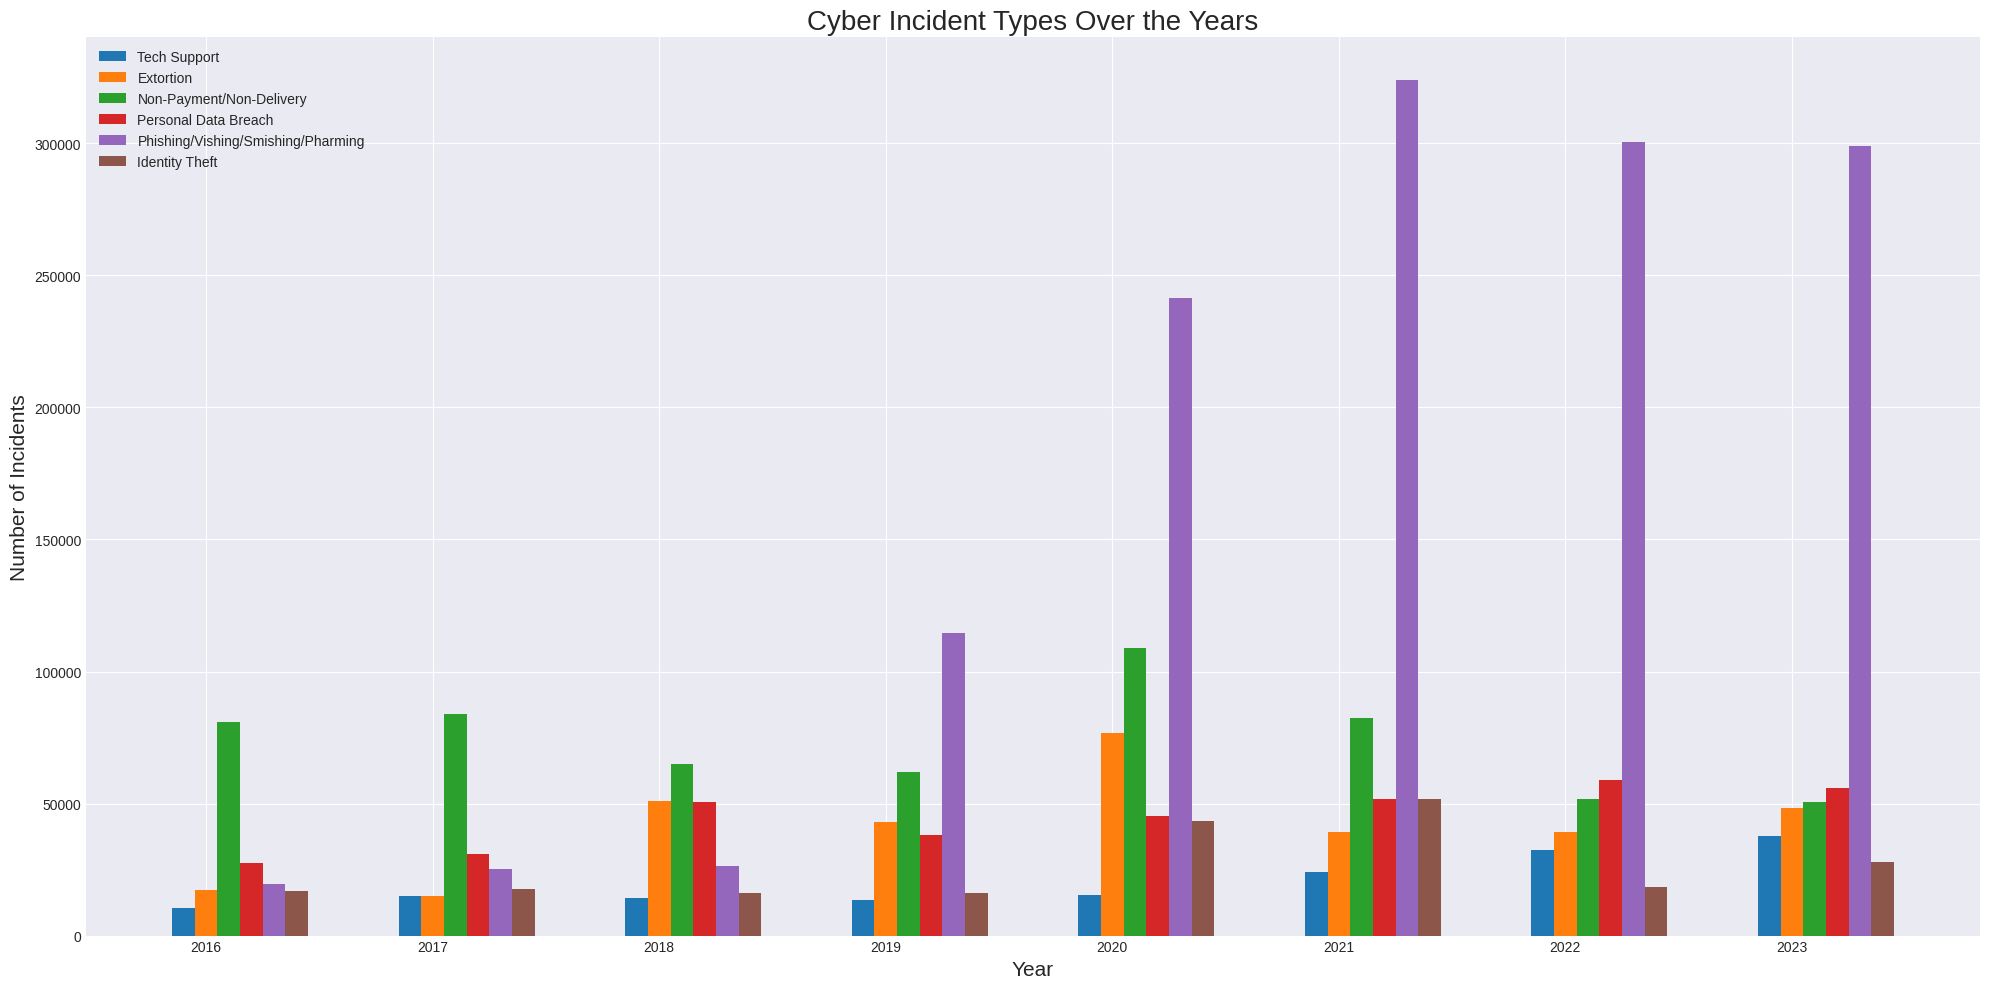

In [ ]:


import numpy as np

# Plotting multiple bar charts for each category

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Number of bars for each category
n_bars = len(df.columns) - 1
bar_width = 0.1
index = np.arange(len(df['Year']))

# Create bars for each category
for i, column in enumerate(df.columns[1:]):
    plt.bar(index + i * bar_width, df[column], bar_width, label=column)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Incidents', fontsize=15)
plt.title('Cyber Incident Types Over the Years', fontsize=20)
plt.xticks(index + bar_width, df['Year'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-3-d64c96d688fd>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


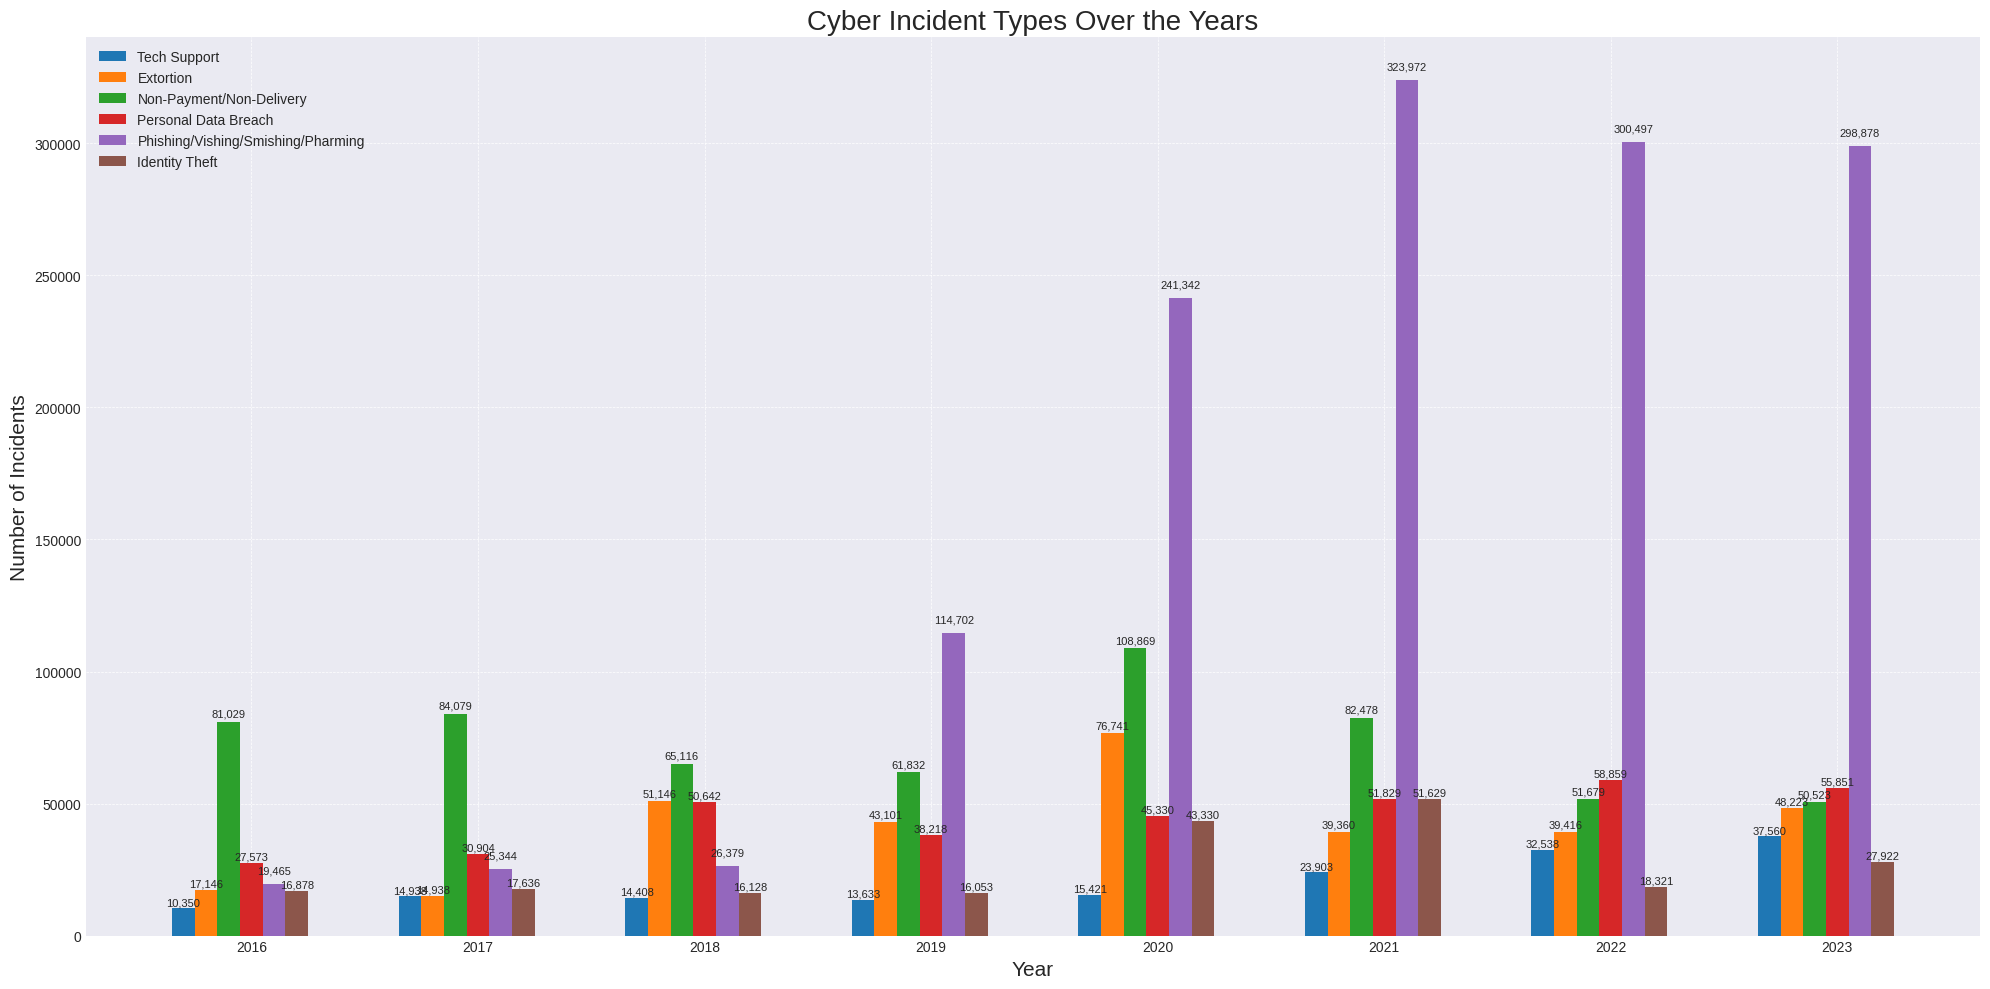

In [ ]:
# Set up the matplotlib figure with the updated style
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

# Define shades of blue and orange for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot bars with data labels
for i, column in enumerate(df.columns[1:]):
    # Plot bars
    bars = plt.bar(index + i * bar_width, df[column], bar_width, label=column, color=colors[i % len(colors)])

    # Add data labels
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + max(df[column])*0.01, f'{int(yval):,}', ha='center', va='bottom', fontsize=8)

# Customize the axes and grid
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Incidents', fontsize=15)
plt.xticks(index + bar_width * (n_bars / 2), df['Year'])
plt.title('Cyber Incident Types Over the Years', fontsize=20)
plt.legend()

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


# CISSM University of Maryland CISSM Cyber Attacks Database

Center for International and Security Studies at Maryland (CISSM) Cyber Attacks Database and use Exploratory Data Analysis (EDA) to identify current threats. The CISSM Cyber Attacks Database, maintained by the University of Maryland, is a comprehensive resource that was last updated on February 2nd, 2024 \cite{harry2018classifying}.

The analysis of the data was conducted using statistical tools on quantitative data and content analysis tools on qualitative data for Visualization of the data.



In [ ]:
import pandas as pd

# Load the dataset
file_path = "CISSM-export.csv"
data = pd.read_csv(file_path)

# Display the size of the dataset (number of rows and columns)
num_rows, num_cols = data.shape
print("Dataset Size:")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)


Dataset Size:
Number of Rows: 13050
Number of Columns: 14


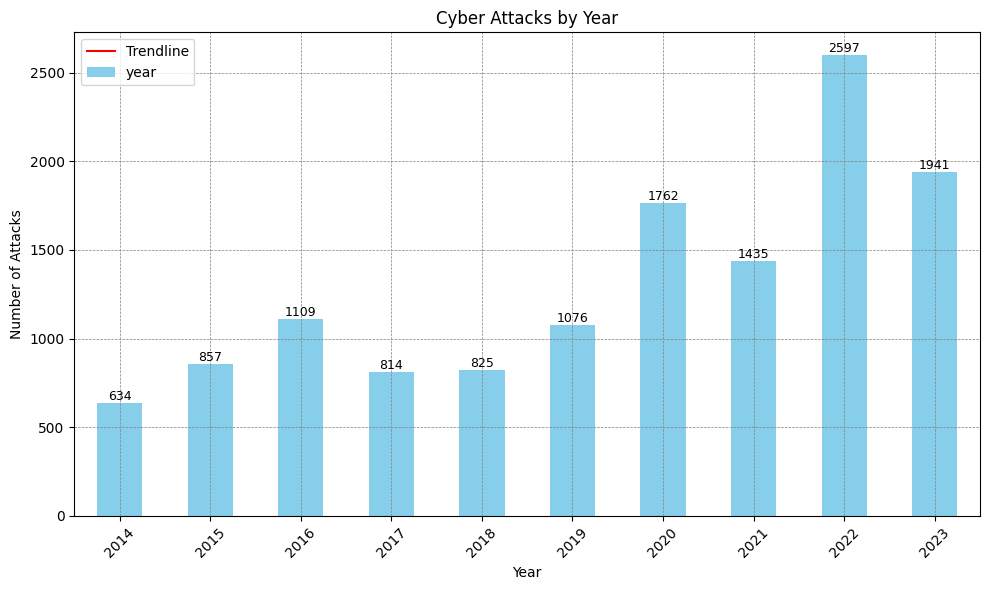

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "CISSM-export.csv"
data = pd.read_csv(file_path)

# Convert 'event_date' column to datetime format
data['event_date'] = pd.to_datetime(data['event_date'])

# Extract year from 'event_date' column
data['year'] = data['event_date'].dt.year

# Bar chart for cyber attacks by year
plt.figure(figsize=(10, 6))
ax = data['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Adding primary horizontal gridlines in light color
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Add trendline
x = data['year'].value_counts().sort_index().index
y = data['year'].value_counts().sort_index().values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', label='Trendline')

# Adding data labels
for i, value in enumerate(data['year'].value_counts().sort_index().values):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Cyber Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Data for Cyber Attacks by Year:
   Year  Number of Attacks
0  2014                634
1  2015                857
2  2016               1109
3  2017                814
4  2018                825
5  2019               1076
6  2020               1762
7  2021               1435
8  2022               2597
9  2023               1941


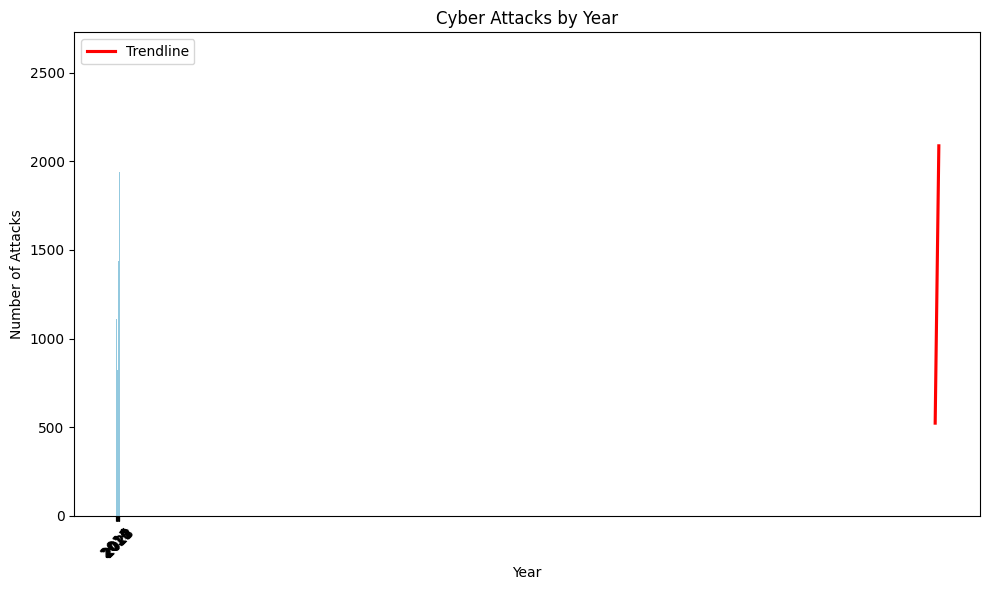

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "CISSM-export.csv"
data = pd.read_csv(file_path)

# Convert 'event_date' column to datetime format
data['event_date'] = pd.to_datetime(data['event_date'])

# Extract year from 'event_date' column
data['year'] = data['event_date'].dt.year

# Count cyber attacks by year
attacks_by_year = data['year'].value_counts().sort_index().reset_index()
attacks_by_year.columns = ['Year', 'Number of Attacks']

# Print data in tabular form
print("Data for Cyber Attacks by Year:")
print(attacks_by_year)

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Number of Attacks', data=attacks_by_year, color='skyblue')

# Overlay trendline on the same graph
sns.regplot(x='Year', y='Number of Attacks', data=attacks_by_year, scatter=False, color='red', ci=None, label='Trendline')

plt.title('Cyber Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


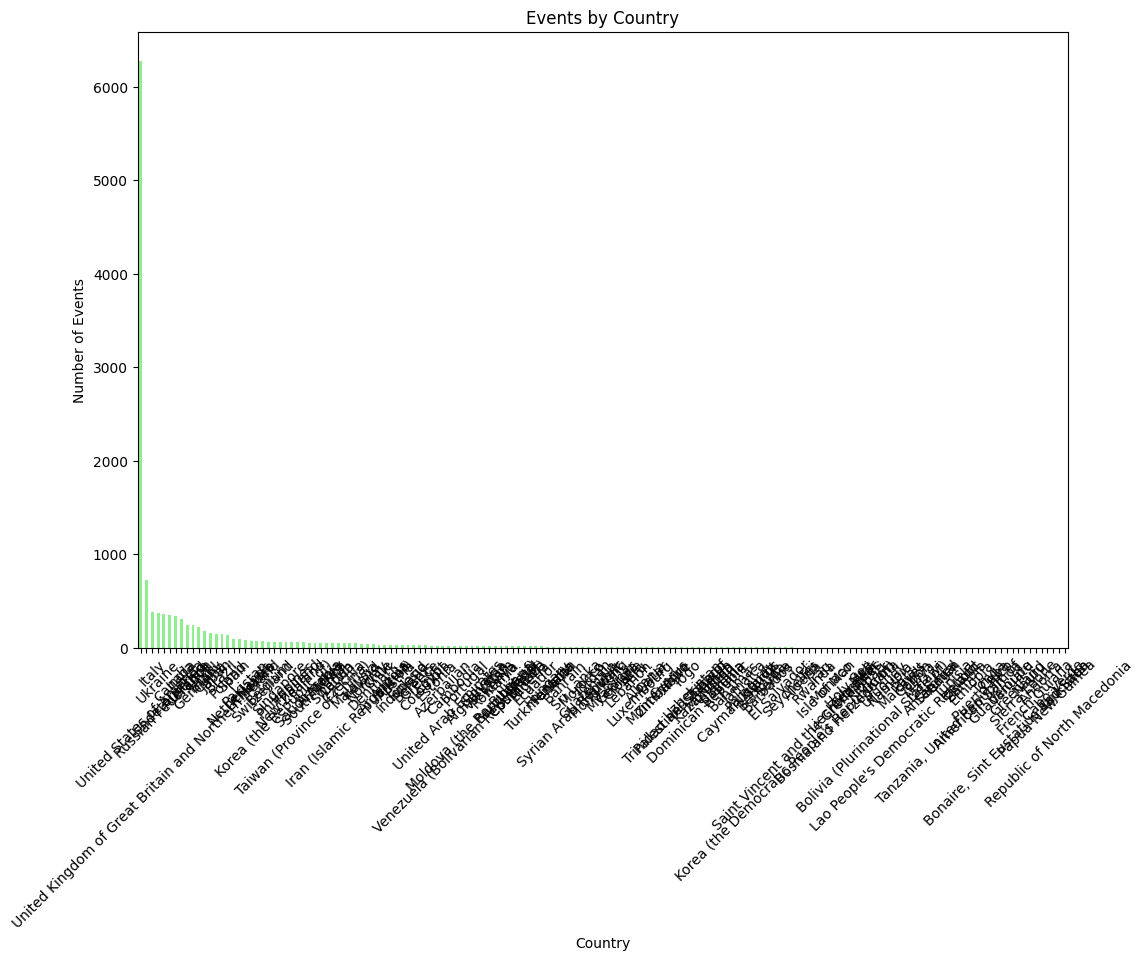

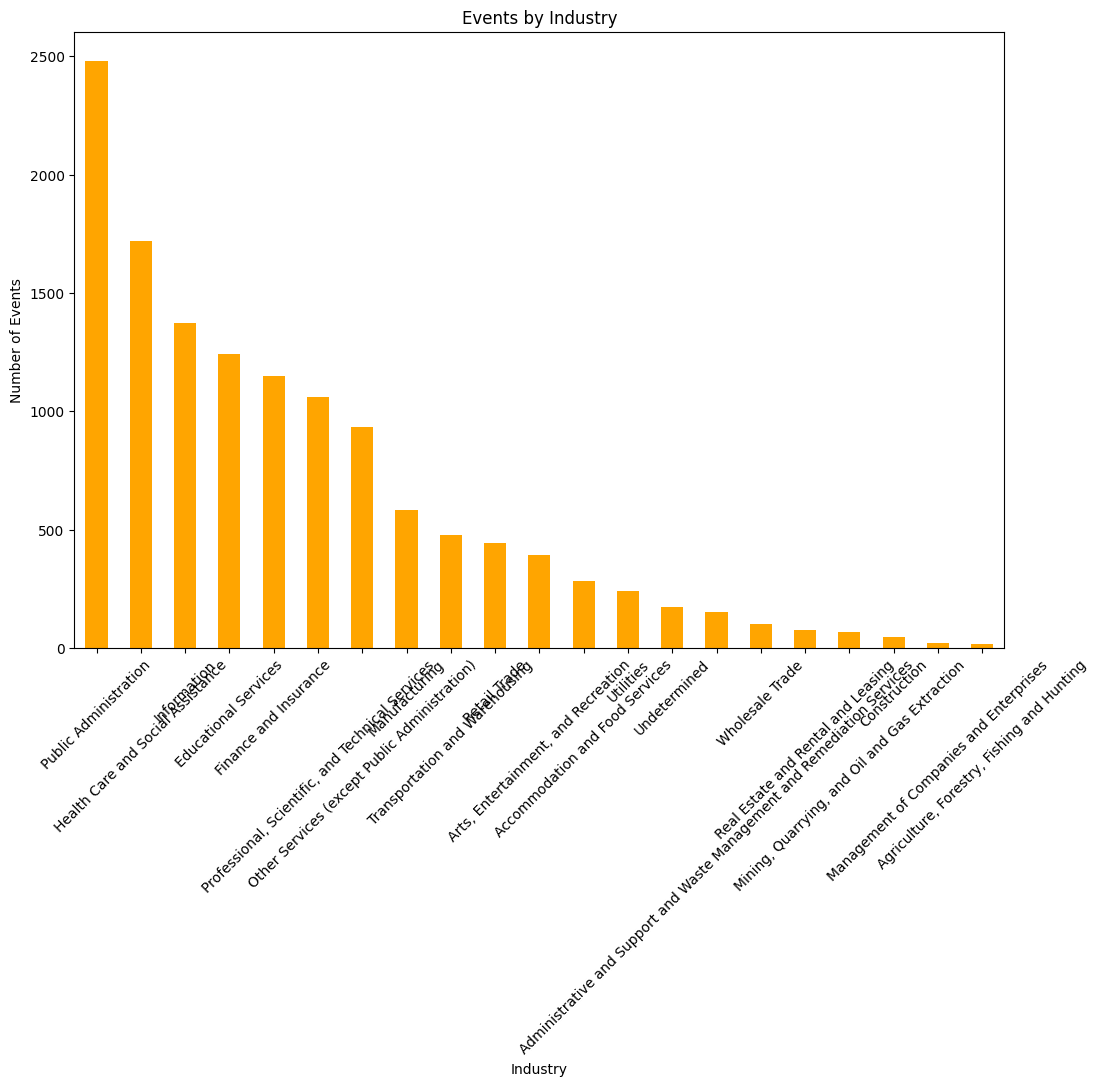

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "CISSM-export.csv"
data = pd.read_csv(file_path)

# Convert 'event_date' column to datetime format
data['event_date'] = pd.to_datetime(data['event_date'])

# Extract year from 'event_date' column
data['year'] = data['event_date'].dt.year

# Bar chart for events by country
plt.figure(figsize=(12, 8))
data['country'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Events by Country')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

# Bar chart for events by industry
plt.figure(figsize=(12, 8))
data['industry'].value_counts().plot(kind='bar', color='orange')
plt.title('Events by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()


# Markeet Groth:

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

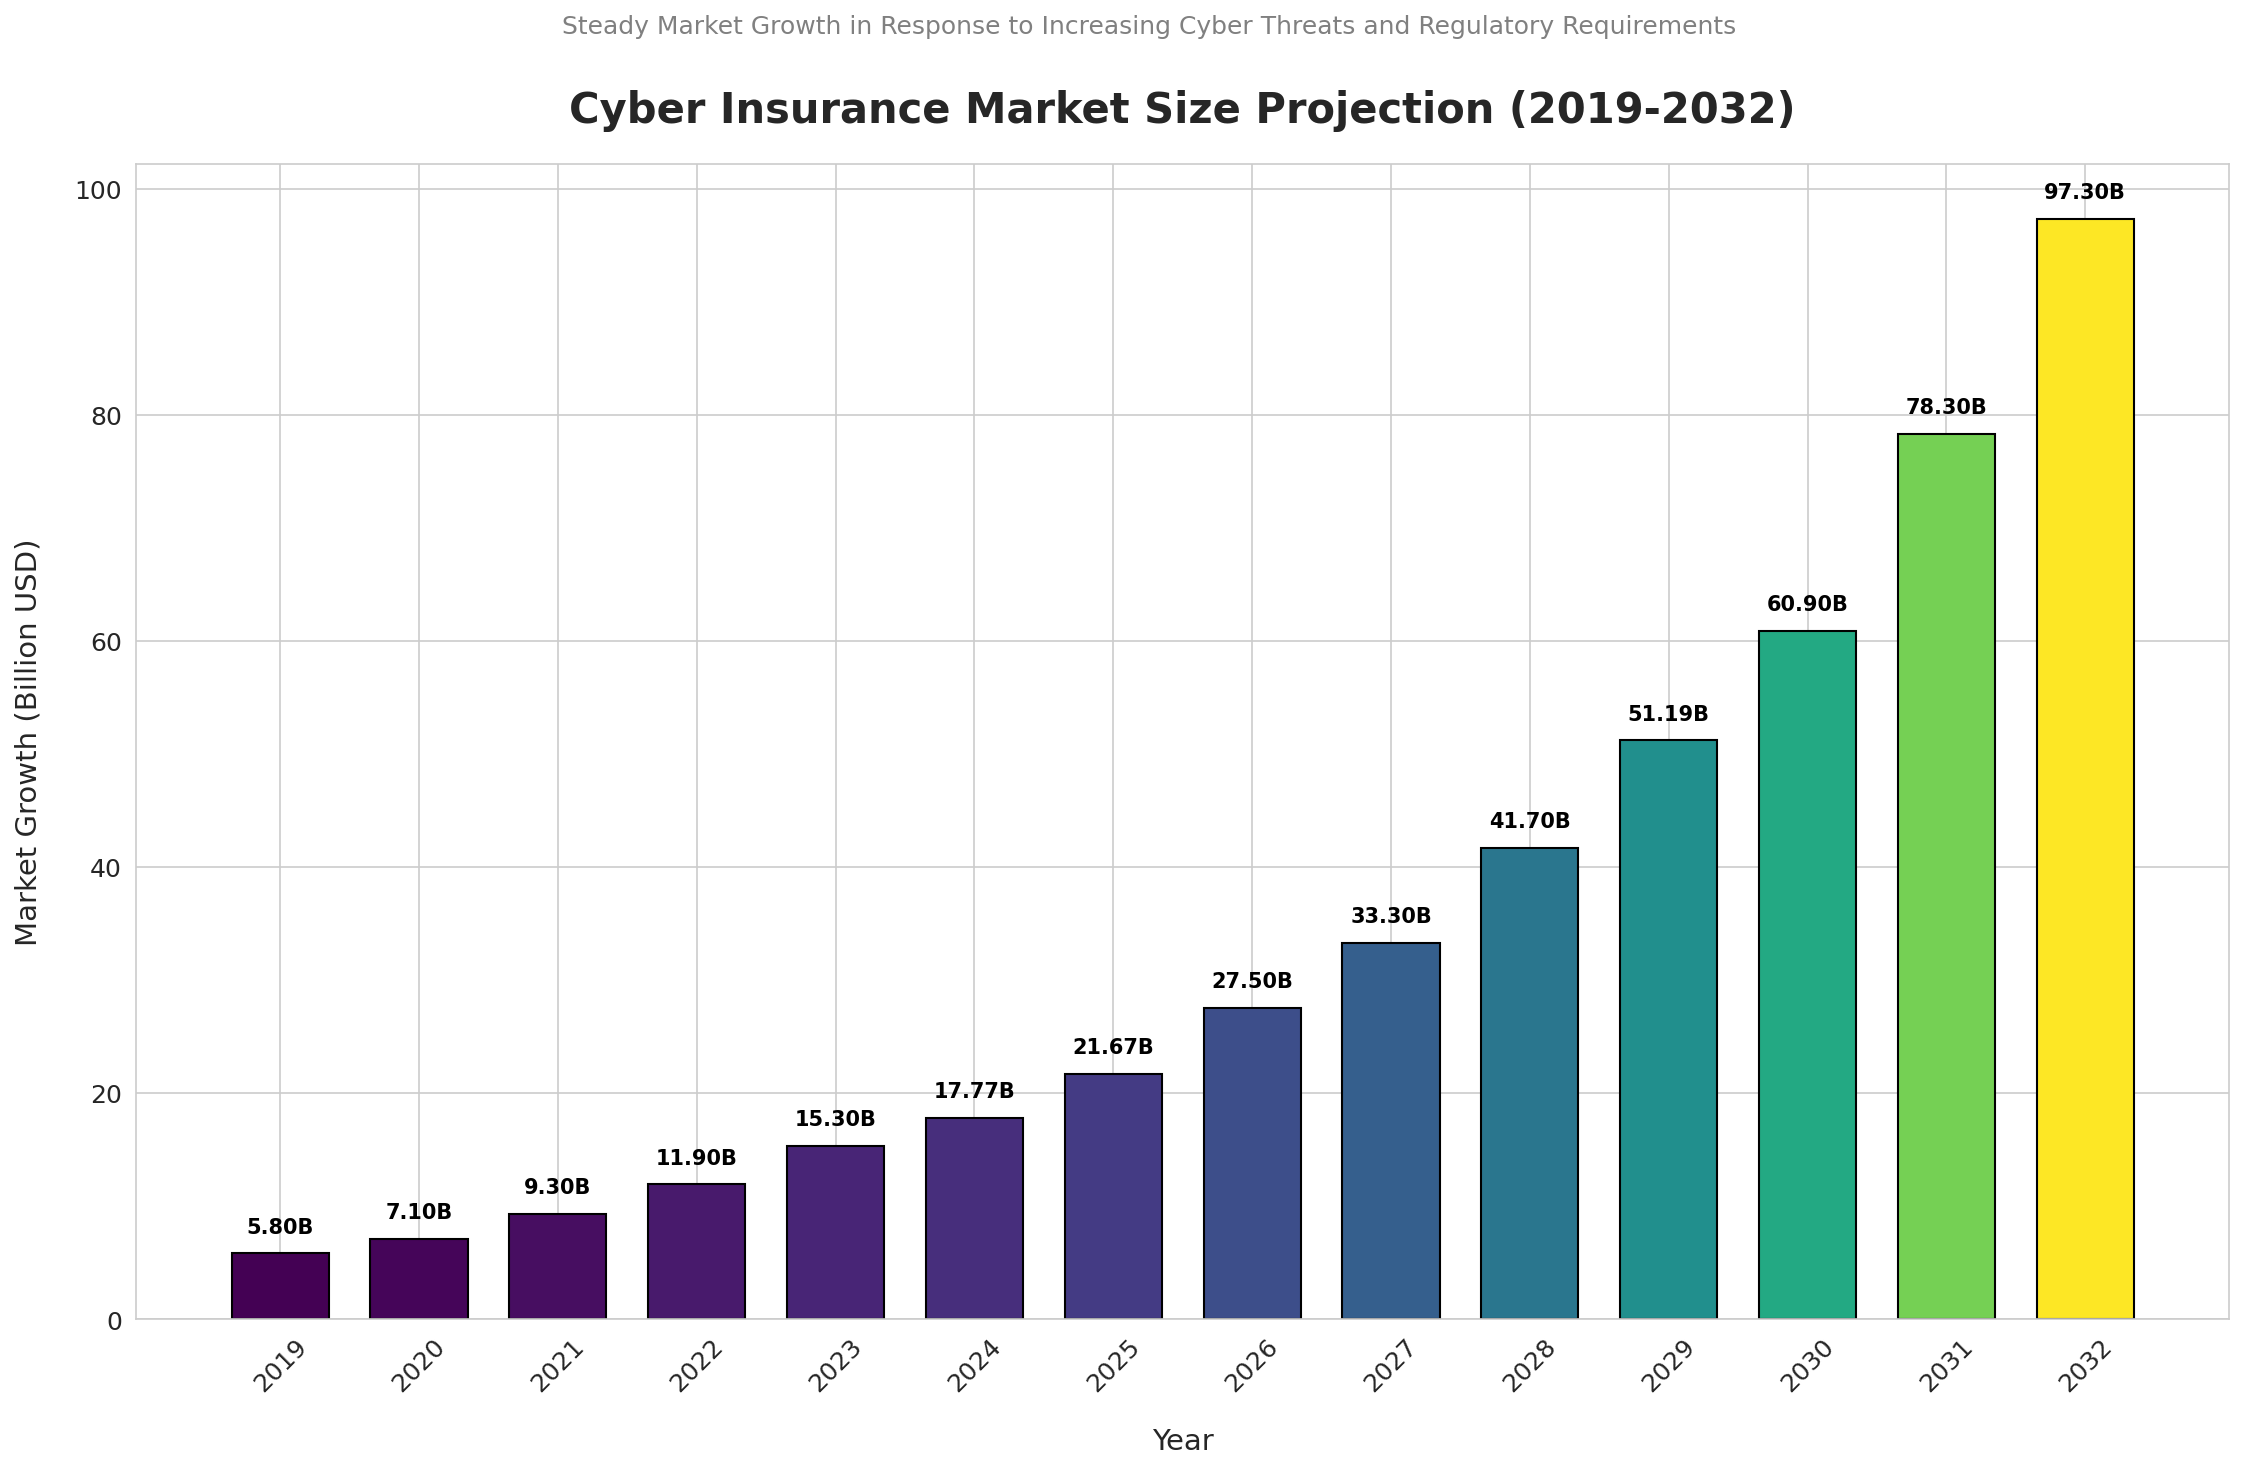

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Preparation
data = {
    'Year': list(range(2019, 2033)),
    'Market Growth (Billion)': [5.8, 7.1, 9.3, 11.9, 15.3, 17.77, 21.67, 27.5, 33.3, 41.7, 51.19, 60.9, 78.3, 97.3]
}

df = pd.DataFrame(data)

# Set the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10), dpi=150)

# Color Gradient
norm = plt.Normalize(df['Market Growth (Billion)'].min(), df['Market Growth (Billion)'].max())
colors = plt.cm.viridis(norm(df['Market Growth (Billion)']))

# Plotting the Bars with gradient colors
bars = plt.bar(df['Year'], df['Market Growth (Billion)'], color=colors, edgecolor='black', width=0.7)

# Add direct data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}B',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 8),  # Distance from bar top
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='black')

# Titles and Captions
plt.title('Cyber Insurance Market Size Projection (2019-2032)', fontsize=20, fontweight='bold', pad=20)
plt.suptitle('Steady Market Growth in Response to Increasing Cyber Threats and Regulatory Requirements', fontsize=12, color='gray')

# Axis labels
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Market Growth (Billion USD)', fontsize=14, labelpad=15)

# Ticks customization
plt.xticks(df['Year'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Colorbar Legend to represent growth scale
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.02)
cbar.set_label('Market Size (Billion USD)', fontsize=12)

# Minimal grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Footer caption
plt.figtext(0.99, 0.01, 'Source: Cyber Insurance Market Analysis 2025', horizontalalignment='right', fontsize=10, color='gray')

# Show plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Data Preparation
years = list(range(2019, 2033))
market_growth = [5.8, 7.1, 9.3, 11.9, 15.3, 17.77, 21.67, 27.5, 33.3, 41.7, 51.19, 60.9, 78.3, 97.3]
df = pd.DataFrame({'Year': years, 'Market Size (Billion)': market_growth})

# Calculate Year-over-Year Growth %
df['YoY Growth %'] = df['Market Size (Billion)'].pct_change() * 100
df['YoY Growth %'] = df['YoY Growth %'].round(1)

# CAGR Calculation
start_value = df['Market Size (Billion)'].iloc[0]
end_value = df['Market Size (Billion)'].iloc[-1]
num_years = len(df) - 1
CAGR = ((end_value / start_value) ** (1 / num_years) - 1) * 100

# Color Bands for Milestones
milestone_colors = []
for year in df['Year']:
    if year <= 2023:
        milestone_colors.append('rgba(102, 194, 165, 0.7)')  # Early-stage
    elif year <= 2029:
        milestone_colors.append('rgba(252, 141, 98, 0.7)')   # Rapid Growth
    else:
        milestone_colors.append('rgba(141, 160, 203, 0.7)')  # Maturity

# Create Bar Chart with Gradient + Shadows
fig = go.Figure()

# Bars with color coding
fig.add_trace(go.Bar(
    x=df['Year'], y=df['Market Size (Billion)'],
    marker=dict(
        color=df['Market Size (Billion)'],
        colorscale='Viridis',
        line=dict(color='black', width=0.5),
    ),
    hovertemplate=
        '<b>Year:</b> %{x}<br>' +
        '<b>Market Size:</b> %{y}B<br>' +
        '<b>YoY Growth:</b> %{customdata[0]}%<br>' +
        '<b>Source:</b> Cyber Insurance Market Report',
    customdata=df[['YoY Growth %']],
    name='Market Size'
))

# Add Milestone Color Bands (Transparent overlays)
fig.add_vrect(x0=2018.5, x1=2023.5, fillcolor="rgba(102, 194, 165, 0.15)", layer="below", line_width=0, annotation_text="Early-stage (2019-2023)", annotation_position="top left")
fig.add_vrect(x0=2023.5, x1=2029.5, fillcolor="rgba(252, 141, 98, 0.1)", layer="below", line_width=0, annotation_text="Rapid Growth (2024-2029)", annotation_position="top left")
fig.add_vrect(x0=2029.5, x1=2032.5, fillcolor="rgba(141, 160, 203, 0.1)", layer="below", line_width=0, annotation_text="Maturity (2030-2032)", annotation_position="top left")

# Trendline (Polynomial 2nd-degree fit)
coeffs = np.polyfit(df['Year'], df['Market Size (Billion)'], 2)
poly_fit = np.poly1d(coeffs)
df['Trendline'] = poly_fit(df['Year'])

fig.add_trace(go.Scatter(
    x=df['Year'], y=df['Trendline'],
    mode='lines',
    line=dict(color='red', dash='dash', width=2),
    name='Polynomial Trendline (2nd-degree)',
    hoverinfo='skip'
))

# Add YoY Growth % labels above bars
for i, row in df.iterrows():
    if i == 0 or pd.isna(row['YoY Growth %']):
        continue
    fig.add_annotation(
        x=row['Year'], y=row['Market Size (Billion)'] + 3,
        text=f"+{row['YoY Growth %']}%",
        showarrow=False,
        font=dict(size=10, color="black")
    )

# CAGR Annotation
fig.add_annotation(
    x=0.01, y=1.08, xref='paper', yref='paper',
    text=f"CAGR (2019-2032): {CAGR:.1f}%",
    showarrow=False,
    font=dict(size=14, color='black'),
    bgcolor="rgba(255,255,255,0.7)",
    bordercolor="black",
    borderwidth=1,
    borderpad=5
)

# Layout Tweaks (Professional Look)
fig.update_layout(
    title={
        'text': 'Cyber Insurance Market Size Projection (2019-2032)',
        'x':0.5, 'xanchor': 'center',
        'font': dict(size=22, family='Arial', color='black')
    },
    xaxis=dict(title='Year', tickmode='linear', dtick=1),
    yaxis=dict(title='Market Size (Billion USD)'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    bargap=0.15,
    margin=dict(l=60, r=60, t=120, b=60),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
)

# Light Border Around the Plot (via Paper Color Rect)
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="black", width=1),
    layer="below"
)

# Show the interactive plot
fig.show()


If you use or rely on this dataset/notebook, please cite the paper:

Muhammad, Z., Straub, J. (2025). An Analysis of Cyber Threats and the Protective Role of Cyber Insurance in the US Market. In: Daimi, K., Arabnia, H.R., Deligiannidis, L. (eds) Security and Management and Wireless Networks. CSCE 2024. Communications in Computer and Information Science, vol 2254. Springer, Cham.
https://doi.org/10.1007/978-3-031-86637-1_19

⚠️ Note: The dataset is based on publicly available information from the FBI Internet Crime Complaint Center (IC3).